In [ ]:
!pip install open3d

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 420.5/420.5 MB 3.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 84.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 77.1/77.1 kB 9.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 139.4/139.4 kB 17.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 233.6/233.6 kB 24.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 89.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 90.9 MB/s eta 0:00:00
  Attempting uninstall: widgetsnbextension
    Found existing installation: widgetsnbextension 3.6.6
    Uninstalling widgetsnbextension-3.6.6:
      Successfully uninstalled widgetsnbextension-3.6.6
  Attempting uninstall: werkzeug
    Found existing installation: Werkzeug 3.0.0
    Uninstalling Werkzeug-3.0.0:
      Successfully uninstalled Werkzeug-3.0.0
  Attempting uninstall: ipywidgets
    Found existing installation: ipywi

In [ ]:
import tensorflow as tf
import os
import numpy as np
import open3d as o3d
import shutil
from tensorflow import keras
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Flatten, Dense, Reshape, TimeDistributed,Conv3D, MaxPooling3D
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
tf.config.run_functions_eagerly(True)

In [ ]:
tf.data.experimental.enable_debug_mode()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#path should be changed according to shared folder path
!unzip '/content/drive/MyDrive/Dataset/appled.zip'

Archive:  /content/drive/MyDrive/Dataset/appled.zip
   creating: apple/
   creating: apple/39_1757_5191/
  inflating: apple/39_1757_5191/pointcloud.ply  
   creating: apple/39_1757_5191/images/
  inflating: apple/39_1757_5191/images/frame000010.jpg  
  inflating: apple/39_1757_5191/images/frame000028.jpg  
  inflating: apple/39_1757_5191/images/frame000021.jpg  
  inflating: apple/39_1757_5191/images/frame000054.jpg  
  inflating: apple/39_1757_5191/images/frame000064.jpg  
  inflating: apple/39_1757_5191/images/frame000055.jpg  
   creating: apple/43_2155_6526/
  inflating: apple/43_2155_6526/pointcloud.ply  
   creating: apple/43_2155_6526/images/
  inflating: apple/43_2155_6526/images/frame000007.jpg  
  inflating: apple/43_2155_6526/images/frame000095.jpg  
  inflating: apple/43_2155_6526/images/frame000010.jpg  
  inflating: apple/43_2155_6526/images/frame000097.jpg  
  inflating: apple/43_2155_6526/images/frame000102.jpg  
  inflating: apple/43_2155_6526/images/frame000027.jpg  


In [ ]:
data_root = '/content/apple'
data_folders = os.listdir(data_root)

In [ ]:
shutil.rmtree("/content/apple/350_36676_67000")

In [ ]:

for file in os.listdir(data_root):
    file_path = os.path.join(data_root, file)
    if os.path.isfile(file_path):
        try:
            os.remove(file_path)
            print(f"Removed: {file_path}")
        except Exception as e:
            print(f"Error removing {file_path}: {e}")


Removed: /content/apple/sequence_annotations.jgz
Removed: /content/apple/LICENSE
Removed: /content/apple/set_lists.json
Removed: /content/apple/frame_annotations.jgz
Removed: /content/apple/eval_batches_singlesequence.json
Removed: /content/apple/eval_batches_multisequence.json


In [ ]:

data_root = '/content/apple'
data_folders = os.listdir(data_root)

# Filter out non-directories (if any)
data_folders = [folder for folder in data_folders if os.path.isdir(os.path.join(data_root, folder))]

file_paths = [
    (os.path.join(data_root, folder, 'images'), os.path.join(data_root, folder, 'pointcloud.ply'))
    for folder in data_folders
]

image_dataset = tf.data.Dataset.from_tensor_slices(file_paths)


In [ ]:
def load_image(image_path):
    # Load and decode the image
    image = tf.io.read_file(image_path)
    image = tf.image.decode_jpeg(image, channels=3)

    # Print the original shape of the image
    # print("Original Image Shape:", image.shape)

    # Resize the image
    image = tf.image.resize(image, [224, 224])

    # Print the shape after resizing
    # print("Resized Image Shape:", image.shape)

    # Convert the image to float32 and normalize
    image = tf.image.convert_image_dtype(image, tf.float32)

    return image



In [ ]:
# def load_images(image_folder):
#     # Convert image_folder Tensor to a string
#     # image_folder_str = tf.strings.bytes_split(image_folder).numpy()[0].decode('utf-8')

#     # Now use it with os.path.join
#     # image_dataset = tf.data.Dataset.list_files(os.path.join(data_root, image_folder_str, '*.jpg'))
#     # if tf.executing_eagerly():
#     #     image_folder = image_folder.numpy() if isinstance(image_folder, tf.Tensor) else image_folder

#     # # If image_folder is a bytes object, decode it to string
#     # if isinstance(image_folder, bytes):
#     #     image_folder = image_folder.decode()

#     # Join paths using os.path.join
#     image_folder = image_folder.numpy().decode()
#     image_dataset = tf.data.Dataset.list_files(os.path.join(data_root, image_folder, '*.jpg'))

#     # Other processing steps for loading images can be added here
#     images = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

#     return images


In [ ]:
def load_images(image_folder):
    # Create a dataset of file paths using tf.data.Dataset.list_files
    image_folder = image_folder.numpy().decode()
    image_dataset = tf.data.Dataset.list_files(os.path.join(data_root,image_folder, '*.jpg'))

    # Use the load_image function to read and preprocess each image
    images = image_dataset.map(load_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    images_as_tensors = list(images.as_numpy_iterator())

    # Print the shapes of individual images
    # for i, img in enumerate(images_as_tensors):
    #     print(f"Image {i + 1} shape:", img.shape)

    # Stack the list of tensors into a single tensor along the first axis
    images_stacked = tf.stack(images_as_tensors)

    return images_stacked


In [ ]:
sample = iter(image_dataset.take(1)).next()  # Take one element from the dataset
print(type(sample))

# Extract image_folder and point_cloud_path from the tuple
image_folder, point_cloud_path = sample

# Load and process images from the image_folder
sample_images = load_images(image_folder)
print(type(sample_images))
print(sample_images.shape)

# image_iterator = iter(sample_images.as_numpy_iterator())
# for i, image_array in enumerate(image_iterator):
#     print(f"Image {i + 1} shape:", image_array.shape)


<class 'tensorflow.python.framework.ops.EagerTensor'>
<class 'tensorflow.python.framework.ops.EagerTensor'>
(6, 224, 224, 3)


In [ ]:
# def get_min_points_pointclouds(root_directory):
#     min_points = float('inf')  # Initialize with positive infinity

#     for folder_name in os.listdir(root_directory):
#         folder_path = os.path.join(root_directory, folder_name)
#         if os.path.isdir(folder_path):
#             point_cloud_file = os.path.join(folder_path, 'pointcloud.ply')

#             if os.path.exists(point_cloud_file):
#                 point_cloud = o3d.io.read_point_cloud(point_cloud_file)
#                 num_points = len(point_cloud.points)
#                 # print(num_points)

#                 if num_points < min_points:
#                     min_points = num_points

#     return min_points

#   # Update with your specific root directory
# min_points = get_min_points_pointclouds(data_root)

# print(f"The point cloud with the minimum number of points has {min_points} points.")


The point cloud with the minimum number of points has 1793 points.


In [ ]:
def load_point_cloud(point_cloud_path, target_num_points=1500):
    # Load the point cloud using open3d

    point_cloud_path = point_cloud_path.numpy().decode()
    point_cloud = o3d.io.read_point_cloud(point_cloud_path)

    # Calculate the current number of points
    current_num_points = len(point_cloud.points)

    # Check if downsampling is needed
    if current_num_points > target_num_points:
        # Calculate the downsampling factor
        downsampling_factor = target_num_points / current_num_points

        # Use random downsample to achieve the target number of points
        downsampled_indices = np.random.choice(current_num_points, size=target_num_points, replace=False)
        downsampled_points = np.asarray(point_cloud.points)[downsampled_indices]
    else:
        # If no downsampling is needed, use all points
        downsampled_points = np.asarray(point_cloud.points)

    # Convert the NumPy array to a TensorFlow tensor
    point_cloud_tensor = tf.convert_to_tensor(downsampled_points, dtype=tf.float32)
    return point_cloud_tensor


In [ ]:
# Assuming image_dataset is your tf.data.Dataset
sample = iter(image_dataset.take(1)).next()  # Take one element from the dataset

# Extract image_folder and point_cloud_path from the tuple
image_folder, point_cloud_path = sample

# Load the point cloud using the load_point_cloud function
sample_point_cloud = load_point_cloud(point_cloud_path)
print(type(sample_point_cloud))

# Print the point cloud shape
print("Sample Point Cloud Shape:", sample_point_cloud.shape)


<class 'tensorflow.python.framework.ops.EagerTensor'>
Sample Point Cloud Shape: (1500, 3)


In [ ]:
# for i, (image_path, point_cloud_path) in enumerate(image_dataset):
#     print(f"Example {i + 1} - Image Path: {image_path}, Point Cloud Path: {point_cloud_path}")

In [ ]:
def load_images_and_point_cloud_wrapper(image_folder, point_cloud_path):
    images = tf.py_function(load_images, [image_folder], tf.float32)
    # images = load_images(image_folder)
    point_cloud = tf.py_function(load_point_cloud, [point_cloud_path], tf.float32)

    # images.set_shape([224, 224, 3])  # Adjust the shape according to your images
    point_cloud.set_shape([1500, 3])
    return images,point_cloud


In [ ]:
# Assuming image_dataset is your tf.data.Dataset
sample = iter(image_dataset.take(1)).next()  # Take one element from the dataset

# Extract image_folder and point_cloud_path from the tuple
image_folder, point_cloud_path = sample

# Load the point cloud using the load_point_cloud function
sample_dataset = load_images_and_point_cloud_wrapper(image_folder,point_cloud_path)
print(type(sample_point_cloud))

# Print the point cloud shape
print("Sample Point Cloud Shape:", sample_point_cloud.shape)
print("Images Shape:", sample_dataset[0].numpy().shape)
print("Point Cloud Shape:", sample_dataset[1].numpy().shape)


<class 'tensorflow.python.framework.ops.EagerTensor'>
Sample Point Cloud Shape: (1500, 3)
Images Shape: (6, 224, 224, 3)
Point Cloud Shape: (1500, 3)


In [ ]:
dataset = image_dataset.map(lambda x: load_images_and_point_cloud_wrapper(x[0], x[1]))

In [ ]:
print(type(dataset))

<class 'tensorflow.python.data.ops.map_op._MapDataset'>


In [ ]:
# Create an iterator for the dataset
iterator = iter(dataset)

# Get the first element from the iterator
sample = next(iterator)

# Print the values
print("Images Shape:", sample[0].numpy().shape)
print("Point Cloud Shape:", sample[1].numpy().shape)

Images Shape: (6, 224, 224, 3)
Point Cloud Shape: (1500, 3)


In [ ]:
# count = 0
# for element in dataset:
#     X, Y = element
#     if X.shape != (6, 224, 224, 3) or Y.shape != (1500,3):
#       print("shape conflict")
#     count += 1
#     # print(count)
#     if count == len(dataset):
#       print("Everything is Good")
#       break

In [ ]:
element_spec = dataset.element_spec
print("Element Spec:", element_spec)

Element Spec: (TensorSpec(shape=<unknown>, dtype=tf.float32, name=None), TensorSpec(shape=(1500, 3), dtype=tf.float32, name=None))


In [ ]:
len(dataset)

395

In [ ]:
# Split the dataset into training and validation sets
train_size = 288
val_size  = 64

train_dataset = dataset.take(train_size)
val_test_dataset = dataset.skip(train_size)
val_dataset = val_test_dataset.take(val_size)
test_dataset = val_test_dataset.skip(val_size)


In [ ]:
# Batch and shuffle the datasets
batch_size = 32
train_dataset = train_dataset.batch(batch_size).shuffle(buffer_size=1000)
train_dataset = train_dataset.prefetch(tf.data.AUTOTUNE)
val_dataset = val_dataset.batch(batch_size)
val_dataset = val_dataset.prefetch(tf.data.AUTOTUNE)
# Iterate through the datasets (for example, to inspect the first batch)
# for batch_X, batch_Y in train_dataset.take(1):
#     print("Batch of X (images):", batch_X)
#     print("Batch of Y (point clouds):", batch_Y)

In [ ]:
test_dataset = test_dataset.batch(batch_size)
test_dataset = test_dataset.prefetch(tf.data.AUTOTUNE)

In [ ]:
print(len(train_dataset))
print(len(val_test_dataset))
print(len(val_dataset))

9
107
2


In [ ]:
# # Create an iterator for the dataset
# iterator = iter(val_dataset)

# # Get the first element from the iterator
# sample = next(iterator)

# # Print the values
# print("Images Shape:", sample[0].numpy().shape)
# print("Point Cloud Shape:", sample[1].numpy().shape)

In [ ]:


# Define the input layer for batch_size sequences of 6 volumes each (224x224x3)
input_layer = Input(shape=(6, 224, 224, 3))

# Convolutional layers for 3D feature extraction
conv1 = Conv3D(32, (2, 2, 2), activation='relu')(input_layer)
pool1 = MaxPooling3D((2, 2, 2), padding='same')(conv1)  # Adjusted pooling and added 'same' padding
conv2 = Conv3D(64, (2, 2, 2), activation='relu')(pool1)
pool2 = MaxPooling3D((2, 2, 2), padding='same')(conv2)

# Flatten the output from convolutional layers
flatten = Flatten()(pool2)

# Fully connected layers
dense1 = Dense(128, activation='relu')(flatten)
dense2 = Dense(64, activation='relu')(dense1)

# Output layer for the point cloud
output_layer = Dense(3 * 1500)(dense2)  # Assuming 1500 coordinates for the point cloud

# Reshape the output to match the format of the point cloud
output_point_cloud = Reshape((1500, 3))(output_layer)

# Create the model
model = keras.Model(inputs=input_layer, outputs=output_point_cloud)


In [ ]:
# # Define the input layer for six 224x224 images
# input_layer = Input(shape=(6,224, 224, 3))

# # Reshape the input to remove the batch size dimension
# reshaped_input = tf.reshape(input_layer, (-1, 224, 224, 3))

# # Convolutional layers for image feature extraction
# conv1 = Conv2D(32, (3, 3), activation='relu')(reshaped_input)
# # conv1 = Conv2D(32, (3, 3), activation='relu')(input_layer)
# pool1 = MaxPooling2D((2, 2))(conv1)
# conv2 = Conv2D(64, (3, 3), activation='relu')(pool1)
# pool2 = MaxPooling2D((2, 2))(conv2)

# # Flatten the output from convolutional layers
# flatten = Flatten()(pool2)

# # Fully connected layers
# dense1 = Dense(128, activation='relu')(flatten)
# dense2 = Dense(64, activation='relu')(dense1)

# # Output layer for the point cloud
# output_layer = Dense(3 * 1500)(dense2)  # Assuming 1500 coordinates for the point cloud

# # Reshape the output to match the format of the point cloud
# output_point_cloud = Reshape((1500, 3))(output_layer)

# # Create the model
# model = keras.Model(inputs=input_layer, outputs=output_point_cloud)

In [ ]:
# Print a summary of the model architecture
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 6, 224, 224, 3)   0         
                             ]                                   
                                                                 
 conv3d (Conv3D)             (None, 5, 223, 223, 32)   800       
                                                                 
 max_pooling3d (MaxPooling3  (None, 3, 112, 112, 32)   0         
 D)                                                              
                                                                 
 conv3d_1 (Conv3D)           (None, 2, 111, 111, 64)   16448     
                                                                 
 max_pooling3d_1 (MaxPoolin  (None, 1, 56, 56, 64)     0         
 g3D)                                                            
                                                             

In [ ]:
# Compile the model with an appropriate loss function and optimizer
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
    metrics=['mse']
    )

In [ ]:
# Train the model on the training dataset
history = model.fit(
    train_dataset,
    epochs = 5,
    # batch_size = 79,
    validation_data=val_dataset,
    verbose=1
)

In [ ]:
model.evaluate(test_dataset)

In [ ]:
# Assuming 'model' is your Keras model
model.save('/content/drive/MyDrive/Models/v01.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model = tf.keras.models.load_model('/content/drive/MyDrive/Models/v01.h5')

In [ ]:
# Create an iterator for the dataset
iterator = iter(test_dataset)

# Get the first element from the iterator
sample = next(iterator)

print(type(sample[0]))
# Print the values
print("Images Shape:", sample[0].numpy().shape)
print("Point Cloud Shape:", sample[1].numpy().shape)

<class 'tensorflow.python.framework.ops.EagerTensor'>
Images Shape: (32, 6, 224, 224, 3)
Point Cloud Shape: (32, 1500, 3)


In [ ]:
sample_input = tf.reshape(sample[0],(32,6,224,224,3))
sample_pred = model.predict(sample_input)

1/1 [==============================] - 9s 9s/step


In [ ]:
sample_pred = model.predict(sample[0])

1/1 [==============================] - 0s 205ms/step


In [ ]:
print("Shape of predictions:", sample_pred.shape)

Shape of predictions: (32, 1500, 3)


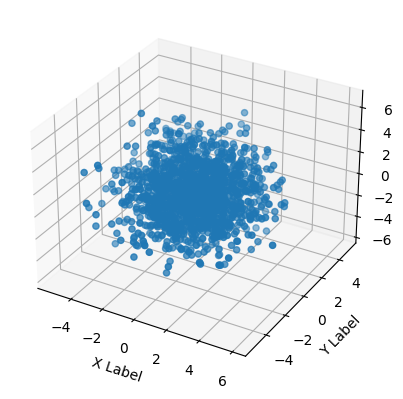

In [ ]:
 # Importing this module is necessary for 3D plotting

# Assuming `predicted_point_cloud` is the output of your model
# It should be a NumPy array with shape (batch_size, 1500, 3)

# Example data (replace this with your actual predicted point cloud)
predicted_point_cloud = sample_pred

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


# Extract x, y, z coordinates from the predicted point cloud
x = predicted_point_cloud[5, :, 0]
y = predicted_point_cloud[5, :, 1]
z = predicted_point_cloud[5, :, 2]

# Create a 3D scatter plot
ax.scatter(x, y, z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

y_true = np.column_stack((x, y, z))

plt.show()


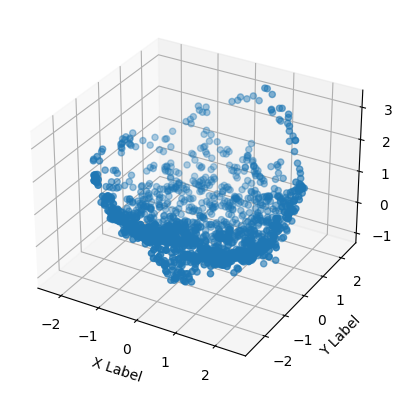

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract x, y, z coordinates from the predicted point cloud
x = predicted_point_cloud[5, :, 0]
y = predicted_point_cloud[5, :, 1]
z = predicted_point_cloud[5, :, 2]

# Create a 3D scatter plot
ax.scatter(x, y, z)

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

y_pred = np.column_stack((x, y, z))

plt.show()

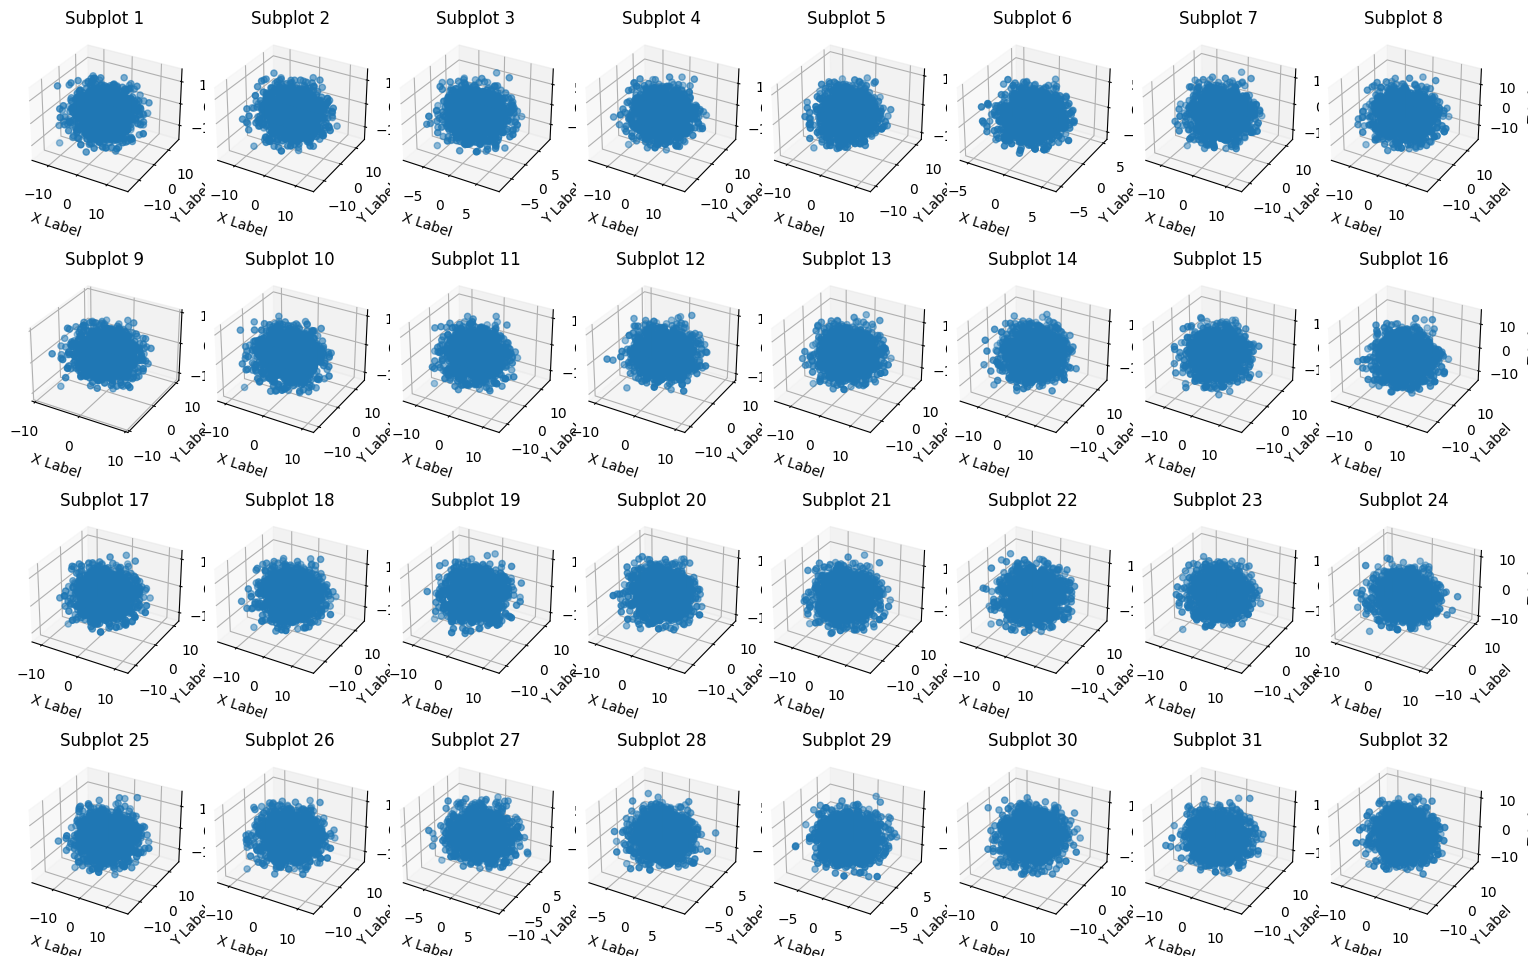

In [ ]:
num_subplots = 32
num_cols = 8
num_rows = num_subplots // num_cols + (num_subplots % num_cols > 0)

predicted_point_cloud = sample_pred

fig = plt.figure(figsize=(15, 10))

for i in range(num_subplots):
    ax = fig.add_subplot(num_rows, num_cols, i + 1, projection='3d')

    # Extract x, y, z coordinates from the predicted point cloud
    x = predicted_point_cloud[ i, :, 0]
    y = predicted_point_cloud[ i, :, 1]
    z = predicted_point_cloud[ i, :, 2]

    # Create a 3D scatter plot
    ax.scatter(x, y, z)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'Subplot {i + 1}')

plt.tight_layout()
plt.show()

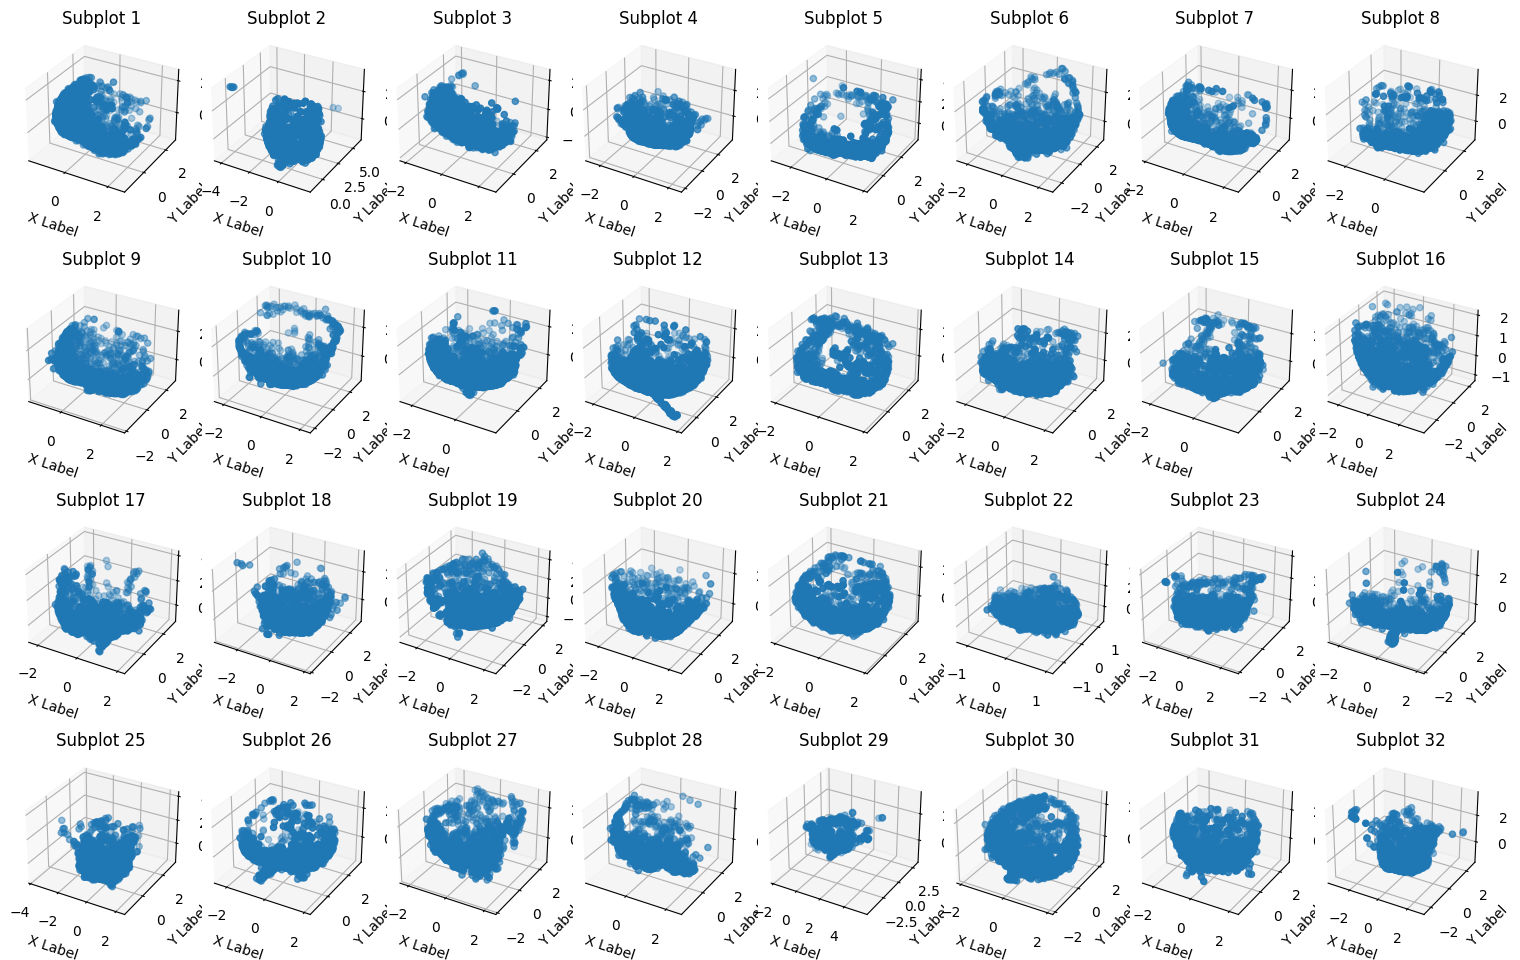

In [ ]:
num_subplots = 32
num_cols = 8
num_rows = num_subplots // num_cols + (num_subplots % num_cols > 0)

predicted_point_cloud = sample[1]

fig = plt.figure(figsize=(15, 10))

for i in range(num_subplots):
    ax = fig.add_subplot(num_rows, num_cols, i + 1, projection='3d')

    # Extract x, y, z coordinates from the predicted point cloud
    x = predicted_point_cloud[ i, :, 0]
    y = predicted_point_cloud[ i, :, 1]
    z = predicted_point_cloud[ i, :, 2]

    # Create a 3D scatter plot
    ax.scatter(x, y, z)

    ax.set_xlabel('X Label')
    ax.set_ylabel('Y Label')
    ax.set_zlabel('Z Label')
    ax.set_title(f'Subplot {i + 1}')

plt.tight_layout()
plt.show()

In [ ]:
!pip install plyfile

1/1 [==============================] - 0s 170ms/step


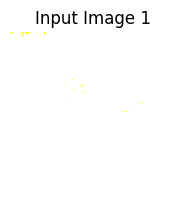

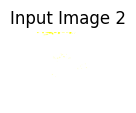

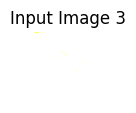

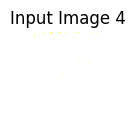

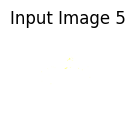

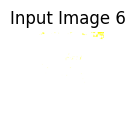

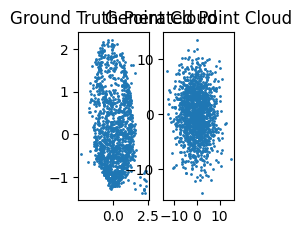

1/1 [==============================] - 0s 227ms/step


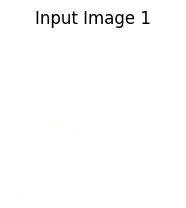

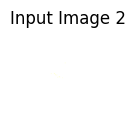

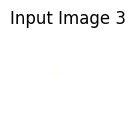

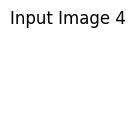

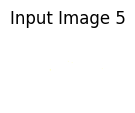

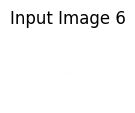

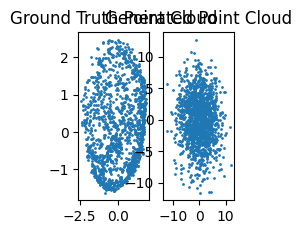

In [ ]:
# Visualize some examples from the validation dataset
num_examples_to_visualize = 5  # Adjust as needed

for i, (input_images, ground_truth_point_clouds) in enumerate(val_dataset.take(num_examples_to_visualize)):
    # Generate 3D objects from input images using the trained model
    generated_point_clouds = model.predict(input_images)

    # Visualize the input images
    plt.figure(figsize=(15, 5))
    for j in range(6):
        plt.subplot(2, 6, j + 1)
        plt.imshow(input_images[0, j])  # Assuming batch size of 1
        plt.axis("off")
        plt.title(f"Input Image {j + 1}")

    # Visualize the ground truth point cloud
    plt.subplot(2, 6, 7)
    plt.scatter(ground_truth_point_clouds[0][:, 0], ground_truth_point_clouds[0][:, 1], s=1)
    plt.title("Ground Truth Point Cloud")

    # Visualize the generated point cloud
    plt.subplot(2, 6, 8)
    plt.scatter(generated_point_clouds[0][:, 0], generated_point_clouds[0][:, 1], s=1)
    plt.title("Generated Point Cloud")

    plt.show()

In [ ]:
def chamfer_distance(point_cloud1, point_cloud2):

    # Calculate the distances from each point in point_cloud1 to the nearest point in point_cloud2
    distances1 = np.min(np.linalg.norm(point_cloud1[:, np.newaxis] - point_cloud2, axis=2), axis=1)

    # Calculate the distances from each point in point_cloud2 to the nearest point in point_cloud1
    distances2 = np.min(np.linalg.norm(point_cloud2[:, np.newaxis] - point_cloud1, axis=2), axis=1)

    # Calculate the Chamfer Distance as the sum of the mean distances in both directions
    chamfer_dist = np.mean(distances1) + np.mean(distances2)

    return chamfer_dist

In [ ]:
# Assuming y_true and y_pred are your ground truth and predicted point clouds, respectively
chamfer_dist = chamfer_distance(y_true, y_pred)
print("Chamfer Distance:", chamfer_dist)

Chamfer Distance: 1.5120182
